<a href="https://colab.research.google.com/github/pingao2019/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/PingAo_Copy_of_LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df0 = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df0.shape)
df0.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [0]:
df = df0.drop('diagnosis',axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
df = df.drop('id',axis=1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


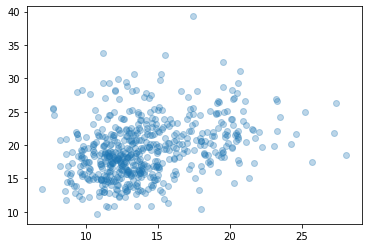

In [0]:
plt.scatter(df['radius_mean'],df['texture_mean'],alpha=.3);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """Entry point for launching an IPython kernel.


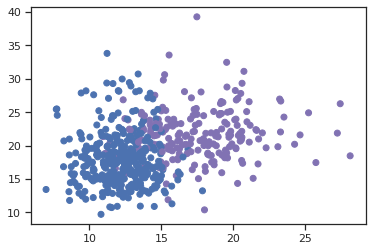

In [0]:
plt.scatter(df['radius_mean'], df['texture_mean'], color=df['diagnosis']);

In [0]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [0]:
#df = df.drop('Unnamed: 32',axis=1)


In [0]:

print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
df.astype(float)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400




    You might want to do some data exploration to see if you can find specific
     columns that will help you find distinct clusters of cells
    You might want to use the elbow method to decide on the number of
     clusters to use.


In [0]:
df.columns.to_list()

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [0]:
df1=df[['radius_mean','texture_mean', 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean', 'smoothness_worst',
 'compactness_worst',
 'concavity_worst', ]].copy()
print(df1.shape)
df1.head()

(569, 9)


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,smoothness_worst,compactness_worst,concavity_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.1622,0.6656,0.7119
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1238,0.1866,0.2416
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.1444,0.4245,0.4504
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2098,0.8663,0.6869
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1374,0.2050,0.4000


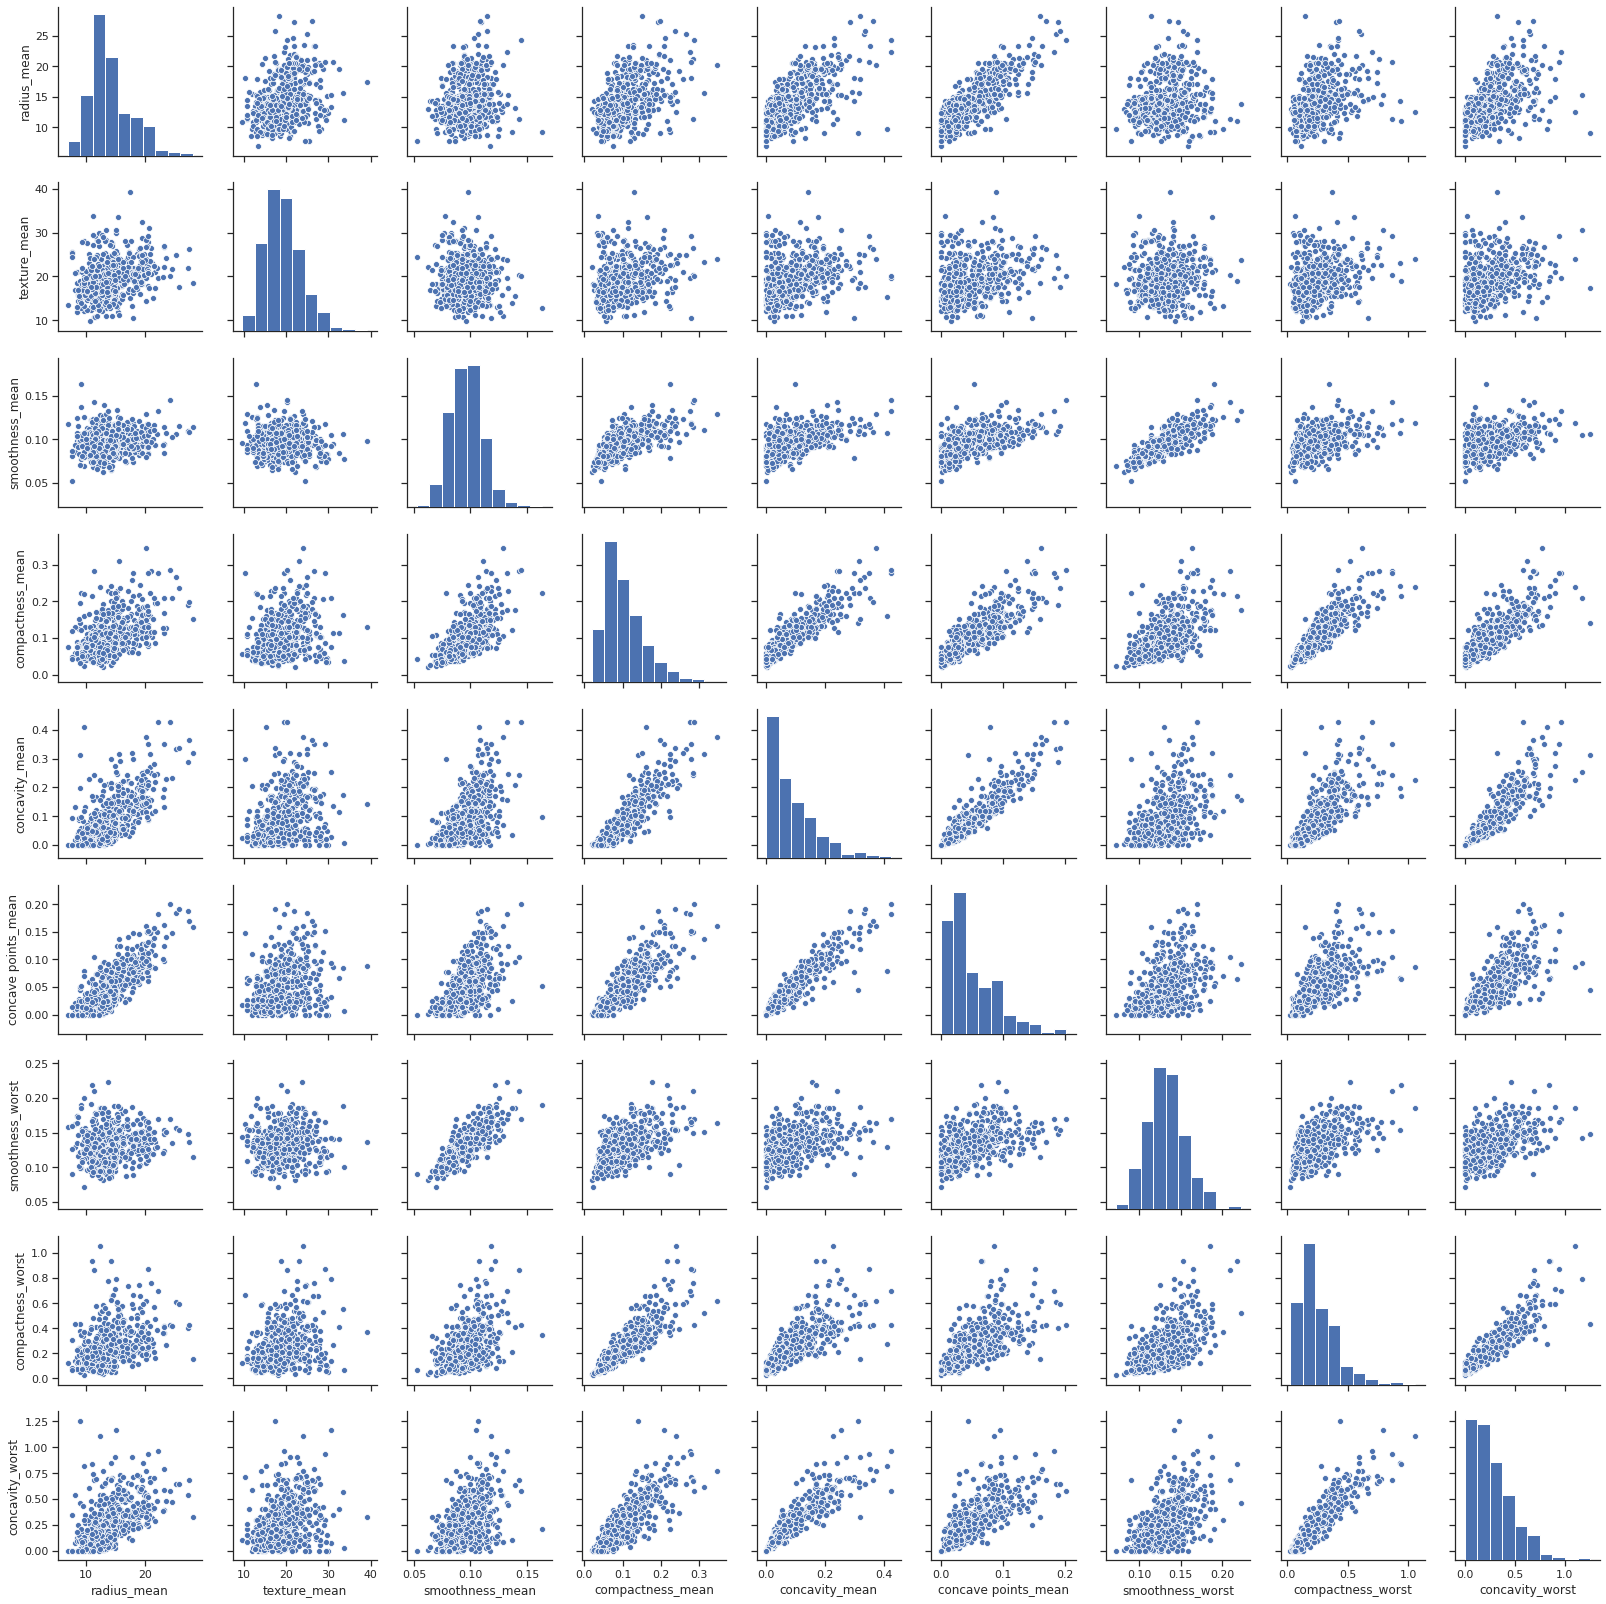

In [0]:
# To analyze all the different scatter plot.How do I know what columns to use when clustering?
#Finding linear separability (or as close as possible to it). "Rush to a Baseline result" and use all of the columns

import seaborn as sns
sns.set(style='ticks', color_codes=True)
g=sns.pairplot(df1)

In [0]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2)
kmeans.fit(df1)
labels = kmeans.labels_

In [0]:
# Perform K-Means Clustering on the Dataset
sum_of_squared_distances = []
K = range(1,11)
distortion=[]
for k in K:
    keanmeans = KMeans(n_clusters=k)
    keanmeans = keanmeans.fit(df1)
    distortion.append(keanmeans.inertia_)
distortion



[70696167.34872742,
 21265245.679236297,
 13190207.945098504,
 7444505.872300221,
 4981073.903289342,
 3621912.658384683,
 2637757.1853219536,
 1919954.0096394909,
 1489028.404245598,
 1212788.2978926506]

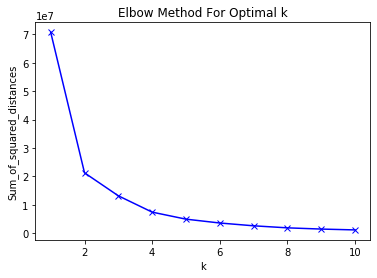

In [0]:
plt.plot(K, distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
# so I choose 2 clusters.

In [0]:
points=df[['radius_mean', 'texture_mean']].copy()

In [0]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2)
kmeans.fit(df1)
labels = kmeans.labels_

print(labels)

[1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1
 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0
 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0
 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1
 1 1 1 1 1 1 0 1 0 0 1 0 

In [0]:
kmeans.cluster_centers_

array([[16.65732751, 23.14772926,  0.09771131,  0.12735087,  0.13453844,
         0.07361922,  0.13653983,  0.32332079,  0.38046667],
       [12.42323824, 16.69111765,  0.09545032,  0.08884315,  0.05799267,
         0.03228292,  0.12955915,  0.20775397,  0.19925994]])

In [0]:
kmeans.n_iter_

9

In [0]:
#Analyze the differences between the two clusters
df['labels'] = kmeans.labels_

df_malignant = df[df['labels'] == 1]
df_malignant.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,labels
count,3.400000e+02,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,0.0,340.0
mean,2.684325e+07,12.423238,16.691118,80.155324,487.642647,0.095450,0.088843,0.057993,0.032283,0.178341,0.063698,0.305806,1.130333,2.149396,24.120159,0.007204,0.022466,0.027701,0.010499,0.020743,0.003750,13.867935,22.224412,90.574824,608.510588,0.129559,0.207754,0.199260,0.087099,0.280652,0.082374,NaN,1.0
std,1.193917e+08,2.102387,2.525484,14.234648,173.017311,0.014200,0.042688,0.056055,0.024615,0.027332,0.007198,0.154620,0.534255,1.064588,16.925318,0.003009,0.016867,0.033374,0.005949,0.007806,0.002995,2.625035,4.188273,18.336271,247.838427,0.021813,0.125590,0.168727,0.048937,0.055253,0.016715,NaN,0.0
min,8.913000e+03,6.981000,9.710000,43.790000,143.500000,0.064290,0.023440,0.000000,0.000000,0.116700,0.051760,0.111500,0.360200,0.757000,6.802000,0.001713,0.003012,0.000000,0.000000,0.009539,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.165200,0.055210,NaN,1.0
25%,8.690778e+05,11.147500,14.930000,71.462500,381.700000,0.085102,0.058783,0.023218,0.016857,0.160100,0.058930,0.210350,0.763075,1.471000,15.495000,0.005298,0.011732,0.011687,0.006800,0.015360,0.002153,12.305000,19.257500,79.282500,457.950000,0.114150,0.122900,0.085193,0.055560,0.245725,0.070935,NaN,1.0
50%,9.049700e+05,12.285000,16.840000,78.695000,463.300000,0.094915,0.078660,0.040600,0.026115,0.173900,0.062340,0.271050,1.015000,1.935000,20.270000,0.006535,0.017035,0.019830,0.009408,0.018840,0.002925,13.500000,22.010000,87.715000,553.650000,0.129250,0.182300,0.161200,0.081825,0.274550,0.078220,NaN,1.0
75%,8.737249e+06,13.640000,18.552500,87.850000,571.025000,0.104400,0.111775,0.077260,0.040890,0.193450,0.066480,0.356400,1.387500,2.522000,27.122500,0.008535,0.028960,0.033450,0.012852,0.023832,0.004287,15.140000,25.355000,99.340000,706.300000,0.142025,0.254850,0.264400,0.107625,0.306875,0.088720,NaN,1.0
max,9.113205e+08,21.370000,21.980000,141.300000,1386.000000,0.163400,0.283900,0.410800,0.147100,0.304000,0.097440,1.296000,4.885000,8.589000,153.400000,0.021770,0.106400,0.396000,0.052790,0.061460,0.029840,25.380000,36.320000,184.600000,2019.000000,0.218400,0.937900,1.252000,0.265400,0.663800,0.173000,NaN,1.0


In [0]:
df_benign = df[df['labels'] == 0]
df_benign.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,labels
count,2.290000e+02,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,0.0,229.0
mean,3.561077e+07,16.657328,23.147729,109.509039,903.202620,0.097711,0.127351,0.134538,0.073619,0.185350,0.061461,0.552703,1.345311,3.930100,64.414603,0.006799,0.029950,0.038119,0.013722,0.020244,0.003862,19.834371,30.803668,132.035764,1284.533624,0.136540,0.323321,0.380467,0.155447,0.304067,0.086279,NaN,0.0
std,1.330343e+08,3.688779,3.403298,25.544621,400.464971,0.013780,0.057872,0.087430,0.042715,0.027056,0.006644,0.345616,0.553170,2.568213,61.278464,0.002983,0.018502,0.023426,0.006000,0.008916,0.002025,5.156101,4.884078,35.795765,664.808025,0.023707,0.173788,0.215390,0.066329,0.068317,0.019700,NaN,0.0
min,8.670000e+03,7.691000,17.250000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.119400,0.475700,1.059000,8.605000,0.002667,0.002252,0.000000,0.000000,0.007882,0.000968,8.678000,18.470000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040,NaN,0.0
25%,8.733570e+05,13.820000,20.710000,91.380000,595.900000,0.087910,0.083480,0.061950,0.037450,0.166300,0.056470,0.303700,1.001000,2.244000,25.130000,0.005020,0.016790,0.022540,0.010070,0.014860,0.002461,15.750000,27.260000,105.300000,762.400000,0.121100,0.192200,0.241600,0.110500,0.256700,0.072420,NaN,0.0
50%,9.140620e+05,16.350000,22.440000,108.400000,832.900000,0.097400,0.120400,0.126700,0.075070,0.184000,0.060650,0.474300,1.232000,3.270000,48.900000,0.006176,0.026480,0.033910,0.013030,0.018430,0.003407,19.770000,30.500000,129.300000,1218.000000,0.137700,0.308900,0.366200,0.161400,0.296800,0.082340,NaN,0.0
75%,9.011971e+06,19.440000,24.990000,128.300000,1167.000000,0.106800,0.160300,0.185600,0.096640,0.202700,0.065400,0.699700,1.545000,4.792000,86.220000,0.007970,0.037260,0.048150,0.016670,0.022500,0.004760,23.570000,33.480000,157.100000,1670.000000,0.151700,0.412200,0.516500,0.203400,0.330500,0.096180,NaN,0.0
max,9.112962e+08,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.290600,0.082430,2.873000,3.896000,21.980000,542.200000,0.031130,0.135400,0.143800,0.040900,0.078950,0.012840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.555800,0.207500,NaN,0.0


Based on comparing malignant and  benign descriptions, there are a lot of differences from our observation. 	

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
#accuracy
df0['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [0]:
labels

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [0]:
accuracy_df = pd.DataFrame({'diagnosis': df0['diagnosis'], 'label': kmeans.labels_})
accuracy_df.head()

,diagnosis,label
0,M,1
1,M,0
2,M,0
3,M,1
4,M,1


In [0]:
accuracy_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [0]:
#   the most common category with 0, the second most common with 1

accuracy_df['diagnosis'] = accuracy_df['diagnosis'].replace({"B": 0, "M": 1})

accuracy_df

,diagnosis,label
0,1,1
1,1,0
2,1,0
3,1,1
4,1,1
...,...,...
564,1,0
565,1,0
566,1,0
567,1,0


In [0]:
(accuracy_df['diagnosis'] == accuracy_df['label']).value_counts()[1]/len(accuracy_df)

0.16695957820738136

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
##### Your Code Here #####
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
z = scaler.fit_transform(df1)
z[0]
 



array([ 1.09706398, -2.07333501,  1.56846633,  3.28351467,  2.65287398,
        2.53247522,  1.30768627,  2.61666502,  2.10952635])

In [0]:
pca=PCA(0.9)


In [0]:
from sklearn.decomposition import PCA

pca = PCA(0.9)
transformed_data = pca.fit_transform(z)

In [0]:
len(transformed_data.T)

4

Totally 4 Principal Components make up 90% of the explained variance

In [0]:
dir(kmeans)

In [0]:
print(pca.explained_variance_)

[5.59227348 1.44036442 0.80394364 0.62073605]


In [0]:
print(pca.explained_variance_ratio_)

[0.62027169 0.15975922 0.08917008 0.06884946]


In [0]:
pca.explained_variance_ratio_[:16].sum()

0.9820446715106615

In [0]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
   

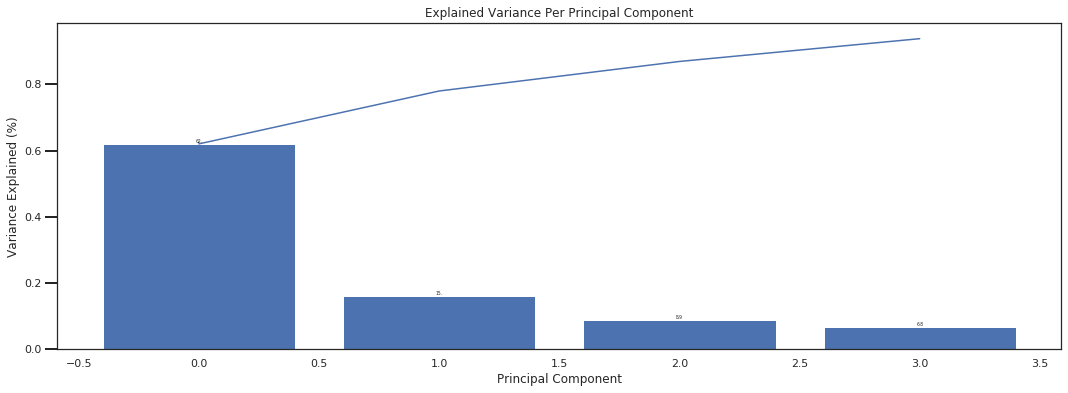

In [0]:
scree_plot(pca)

In [0]:
pca_features[:,0:1]

In [0]:
pca_features[:,1:2]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """Entry point for launching an IPython kernel.


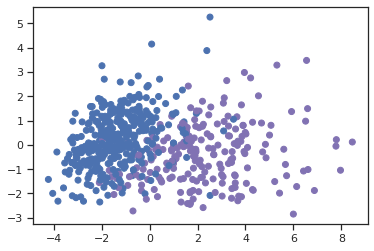

In [0]:
plt.scatter(pca_features[:,0:1], pca_features[:,1:2], color=df0['diagnosis']);

In [0]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(transformed_data)
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [0]:
accuracy_df['diagnosis'] = accuracy_df['diagnosis'].replace({"B":0, "M":1})

 

In [0]:
 (accuracy_df['diagnosis'] == accuracy_df['label']).value_counts()[1]/len(accuracy_df)


0.8875219683655536

Conclusion: After doing PCA , then do kmean test, we get 0.8875219683655536 accuracy, higher than without PCA and do only simple clustering. So PCA can increase the accuracy.

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project